# Hente og lese inn data til pandas

## CSV 

* En vanlig måte å lagre data på er i csv-format
* csv = comma separated values
* I en csv-fil har vi data lagret som tekst i en type tabellformat
* Hver linje i filen er et datapunkt, og inneholder et eller flere felt med data (kolonner)
* Datafeltene er separert med en *separator*, ofte et komma
* Første linje i filen gir gjerne metadata (navn på kolonnene)

## Tegnkoding

* CSV-filer er som sagt vanlig tekst, men:
    - Tekst kan representeres på forkjellige måter i en datamaskin
    - Måten kalles tegnkodingen (character-coding)
    - Vi må ofte sørge for riktig inputkoding (input-encoding) for å få ut riktig tekst
* Enkleste mulige tegnkoding er ASCII
* Unicode sørger for at vi kan bruke æ,ø,å $\Delta$, $\Gamma$ osv. Feks UTF-8 og UTF-16

<img src="https://upload.wikimedia.org/wikipedia/commons/1/1b/ASCII-Table-wide.svg">

## Unicode
* Unicode er et tegnsett/tegnkoding som har som formål å støtte alle språk
* Alle tegn som brukes må da få sin egen kode
* Til og med [emojis](https://unicode.org/emoji/charts/full-emoji-list.html)
* U+1f911, CLDR Short name: money-mouth-face, 🤑

## Vanlige tegnkodinger:
* Unicode har flere måter å gi tegnkodingene på:
  * 'utf-8'
  * 'utf-16'
  * 'utf-32'
* I tillegg har vi en annen standard litt på siden av  unicode: *ISO-8859-1*
  * Kalles ofte "Latin-1"
  * Koder for det latinske alfabetet
  * Vanlig i bruk i Amerika, Vest-Europa, Oceania og store deler av Afrika

#### SSB
* SSB bruker 'UTF-8' for .XML og JSON formater (mer om JSON senere)
* SSB bruker 'ISO-8859-1' for .csv formatene sine

## CSV + Pandas

* Vi bruker pandas til å lese og lagre csv-filer
* `pd.read_csv("filnavn")`
* `read_csv` har **haugevis** med keyword arguments for å lese rare og potensielt føkka csv-filer
* Vi burde i de fleste tilfeller klare oss med:
    - `encoding = "input-enc"` feks `"utf-8"`
    - `sep = "separator"` feks `","` eller "`\t`" (tab)
    -  `header = rad` feks `header=0`dersom første rad gir kolonnenavnene
    -  `index_col = «kolonnenummer»` Angir hvilken av kolonnene som skal brukes som indeks (nummer eller etikette) 

In [1]:
import pandas as pd

#Leser inn data .csv
BB_df = pd.read_csv("blackboard.csv", encoding="utf-16", sep="\t", index_col=0) 
BB_df

,Etternavn,Fornavn,Brukernavn
0,Aadde,Petter,petteaad
1,Aas,Edvard Tynes,edvardta
2,Adolfsen,Simon Anker,simonado
3,Amundsen,Albert Bakke,alberbam
4,Amundsen,Amanda Oddli,amandaam
...,...,...,...
105,Ulvestad,Andreas Hovden,andrhul
106,Vatle,Camilla,camilvat
107,Vatne,Silje Eiken,siljeeva
108,Zahl-Brathaug,Saga,sagaz


* Filen vi har lastet inn er klasselisten fra blackboard
* på iirmoodle.it.ntnu.no er det mulig å melde folk opp i fag ved å laste *opp* en csv-fil
* `moodle_example.csv` viser hvordan denne filen skal se ut

In [2]:
moodleEx_df = pd.read_csv("moodle_example.csv")
moodleEx_df 

,username,firstname,lastname,email
0,student1,Student,One,s1@example.com
1,student2,Student,Two,s2@example.com
2,student3,Student,Three,s3@example.com


### Opppgave 1

* Lag et dataframe fra "blackboard.csv" som er formatert slik moodle vil ha det

In [3]:
BB_df
data_til_moodle = {"username": BB_df["Brukernavn"],
                   "firstname": BB_df["Fornavn"],
                   "lastname": BB_df["Etternavn"]}
moodle_formatert_df = pd.DataFrame(data=data_til_moodle)

#Med for løkke
#email_data = []
#for brukernavn in BB_df["Brukernavn"]:
#    email_data.append(f"{brukernavn}@stud.ntnu.no")
#moodle_formatert_df["email"] = email_data
#moodle_formatert_df

#Med serialisering
moodle_formatert_df["email"] = moodle_formatert_df["username"]+"@stud.ntnu.no"

#Med .apply/map
def leggtilstud(brukernavn):
    epost = f"{brukernavn}@stud.ntnu.no"
    return epost

moodle_formatert_df["email"] = moodle_formatert_df["username"].map(leggtilstud)
moodle_formatert_df

,username,firstname,lastname,email
0,petteaad,Petter,Aadde,petteaad@stud.ntnu.no
1,edvardta,Edvard Tynes,Aas,edvardta@stud.ntnu.no
2,simonado,Simon Anker,Adolfsen,simonado@stud.ntnu.no
3,alberbam,Albert Bakke,Amundsen,alberbam@stud.ntnu.no
4,amandaam,Amanda Oddli,Amundsen,amandaam@stud.ntnu.no
...,...,...,...,...
105,andrhul,Andreas Hovden,Ulvestad,andrhul@stud.ntnu.no
106,camilvat,Camilla,Vatle,camilvat@stud.ntnu.no
107,siljeeva,Silje Eiken,Vatne,siljeeva@stud.ntnu.no
108,sagaz,Saga,Zahl-Brathaug,sagaz@stud.ntnu.no


* Vi lagrer et dataframe til csv med `df.to_csv("filnavn.csv", **kwargs)`
* når vi ser `**kwargs` på denne måten, betyr det at her kommer «keyword arguments»
* Vi kan se i [dokumentasjonen](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html) får å finne hvilke «kwargs» funksjonen tar

In [4]:
moodle_formatert_df.to_csv("moodle_formatert.csv", index=False)

* Det er mye å holde styr på i Pandas, og vi går ikke igjennom alle aspekter
* Ha en [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) for hånden
* Slå opp i diverse [tutorials](https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html)
* Spesielt [denne](https://www.skytowner.com/explore/pandas_recipes_reference) kan være kjekk (Pandas oppskrifter :) )

# Pandas i praksis

* Vi kan hente data å analysere, feks fra [statistisk sentralbyrå](http://www.ssb.no)
* SSB bruker tegnkodinger «UTF-8» og «ISO-8859-1»

In [17]:
#Vi går til ssb.no og henter et datasett om arbeidsledige
arbeidsledige_df = pd.read_csv("arbeidsledige.csv", encoding="ISO-8859-1", header=1, sep=";")
arbeidsledige_df = arbeidsledige_df.set_index("kvartal")
arbeidsledige_df

,Arbeidsledige (1 000 personer)
kvartal,
1972K1,24
1972K2,26
1972K3,31
1972K4,31
1973K1,22
...,...
2023K2,105
2023K3,107
2023K4,106


In [21]:
# Vi henter et datasett med åpnede konkurser fra SSB
konkurser_df = pd.read_csv("konkurser.csv", encoding="ISO-8859-1", sep="\t", index_col=0)
konkurser_df


,Opna konkursar
måned,
1980M01,75
1980M02,49
1980M03,65
1980M04,58
1980M05,56
...,...
2024M04,466
2024M05,387
2024M06,419


### Analyse:
* Vi vil slå sammen dataene våre om arbeidsledighet og åpnede konkurser
* Er det en sammenheng?

In [22]:
konkurser_df+arbeidsledige_df #Det funket dårlig....

,Arbeidsledige (1 000 personer),Opna konkursar
1972K1,NaN,NaN
1972K2,NaN,NaN
1972K3,NaN,NaN
1972K4,NaN,NaN
1973K1,NaN,NaN
...,...,...
2024M04,NaN,NaN
2024M05,NaN,NaN
2024M06,NaN,NaN
2024M07,NaN,NaN


# Slå sammen data
Vi må passe på en rekke ting når vi skal slå sammen data:
* Matchende datatyper: 2 kolonner blir ansett som forkjellige dersom de har forskjellige datatyper men matchende data
* Hva skal vi beholde (Alt som matcher, kun matchende data fra nr 1 eller 2 dataframe)
* Dersom man slår sammen på index, må disse samsvare

* Vi trenger nå å slå sammen data som går over forskjellige tidsspenn
* Indeksen vår består av *tekststrenger* -- dette byr på problemer

<img src="https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEgCOoEr1biiaMsoejCtfdvgJAq_T6TfbjVkrc-zyfJ8ReSf8BvldJXPjyNy1gjfGVmB2hk2i39ybpaLHKDK4kTn4n2Zh-dXlaayliZoiygxhTQ3W7mC2LoxzTOARAhltRmSn84pdQdmqrbu/s1600/AD951881-737E-4F2C-AE8E-D80E280CFFD5.png">

## Datetime, pandas.Period
* Veldig mye av data tilgjengelig viser statistiske variabler over tid.
* For ingeniører er tid veldig enkelt: Det er en fysisk størrelse og en av grunnenhetene i SI-system: *sekund*
* I business er det verre. Vi måler tid i dager, sekunder, minutter, uker, måneder, kvartaler eller år
* År er delt inn i måneder med ujevnt fordelte dager, vi har skuddår og tidssoner, sommertid/vintertid osv...
* Vi kan få masse hjelp dersom tidsseriene vår bruker datatyper for tid fra `datetime` eller `pandas.Period`

In [42]:
#Jeg måtte gjøre følgende for å få norsk output
import locale
locale.setlocale(locale.LC_ALL, "nb_NO.utf8")

'nb_NO.utf8'

In [32]:
import datetime
from zoneinfo import ZoneInfo
#Henter tid/dato fra datetime.datetime
naa = datetime.datetime.now()

#Henter dato fra datetime.date
dato_i_dag = datetime.date.today()

print("I dag er datoen", dato_i_dag)


I dag er datoen 2024-10-25


In [39]:
#Vi kan lage et spesifikt tidspunkt eller dato:
 
min_dato = datetime.date(1990, 11, 23)  #År, måned, dag
print("Jeg valgte dato: ", min_dato)

#År, måned, dag, time, minutt, sekund, tzinfo=TIDSSONE
tid =  datetime.datetime(2024, 12, 13, 12,0, tzinfo=ZoneInfo("Europe/Oslo") )
print("Mappeinnlevering stenger", tid)

#Vi kan også lage en ENDRING I TID:
#datetime.timedelta(days=0, seconds=0, microseconds=0, milliseconds=0, minutes=0, hours=0, weeks=0)
utsettelse = datetime.timedelta(hours=7, days=1)

ny_dato_mapp = tid+utsettelse
print("Ny tid for mappeinnlevering", ny_dato_mapp)
#Vi kan sammenligne tider/datoer
print(ny_dato_mapp > tid)

Jeg valgte dato:  1990-11-23
Mappeinnlevering stenger 2024-12-13 12:00:00+01:00
Ny tid for mappeinnlevering 2024-12-14 19:00:00+01:00
True


* Fordelen med en slik datatype er at biblioteket selv kan holde kontroll på tidssoner og denslags
* Biblioteket lar oss plusse/trekke fra tider eller datoer med hverandre
* Vi kan sammenligne tid/datoer som betyr at vi lett kan sortere de

# Formattere dato ut
* vi bruker `min_tid.strftime("FORMATTERINGSSTRENG")` for å formatere en dato eller tid
* Formateringsstrenger er litt som en f-streng, men vi limer inn feks året for `"%Y"` i stedet for `f"{year}"`
  | Formatkode | Beskrivelse                            | Eksempel (med dato: 2024-10-21 15:30:45) |
|------------|----------------------------------------|------------------------------------------|
| `%a`       | Forkortet ukedag                       | Man                                      |
| `%A`       | Fullt navn på ukedag                   | Mandag                                   |
| `%w`       | Ukedag som tall (Søndag=0, Mandag=1)   | 1                                        |
| `%d`       | Dag i måneden (nullutfylt)             | 21                                       |
| `%b`       | Forkortet månednavn                    | Okt                                      |
| `%B`       | Fullt månednavn                        | Oktober                                  |
| `%m`       | Måned som tall (nullutfylt)            | 10                                       |
| `%y`       | År (to siffer)                         | 24                                       |
| `%Y`       | År (fire siffer)                       | 2024                                     |
| `%H`       | Time (nullutfylt, 24-timers klokke)    | 15                                       |
| `%I`       | Time (nullutfylt, 12-timers klokke)    | 03                                       |
| `%p`       | AM/PM                                 | PM                                       |
| `%M`       | Minutter (nullutfylt)                  | 30                                       |
| `%S`       | Sekunder (nullutfylt)                  | 45                                       |
| `%f`       | Mikrosekunder (nullutfylt)             | 000000                                   |
| `%z`       | Tidsforskjell fra UTC                  | +0000                                    |
| `%Z`       | Tidsnavn (timezone)                    | UTC                                      |
| `%j`       | Dagnummer i året (001-366)             | 295                                      |
| `%U`       | Ukenummer (Søndag som første dag)      | 43                                       |
| `%W`       | Ukenummer (Mandag som første dag)      | 43                                       |
| `%c`       | Lokal dato og tid                      | Man 21 Oct 15:30:45 2024                 |
| `%x`       | Lokal dato (kort format)               | 21.10.2024                               |
| `%X`       | Lokal tid (kort format)                | 15:30:45                                 |
| `%%`       | Et prosenttegn                        | %                                        |


In [43]:
#Formatere dato ut i en streng
print(ny_dato_mapp.strftime("Ny dato for mappe er %A den %dende klokken %H:%M"))

Ny dato for mappe er lørdag den 14ende klokken 19:00


## Lese inn et datoformat
* Enda mer nyttig er det å kunne lese inn tid/dato skrevet i rare formater
* Da bruker vi samme tabell som for `strftime`, men bruker `datetime.datetime.strptime(dato, "FORMATERINGSSTRENG")`

In [45]:
dato_inn = "21/04/1987"
dato_lest = datetime.datetime.strptime(dato_inn, "%d/%m/%Y")  
print("Dato som datetime objekt:", dato_lest) 

Dato som datetime objekt: 1987-04-21 00:00:00


## Pandas.period
* Pandas har en egen klasse/type for å jobbe med perioder og tidsintervall
* Vi jobber da med spenn av tid, pandas kaller det `frekvenser`
  | Frekvenskode | Beskrivelse              | Eksempel                               |
|--------------|--------------------------|----------------------------------------|
| `A` or `Y`   | Årlig (Year-End)          | 2024                                  |
| `Q`          | Kvartalsvis               | 2024Q1                                |
| `M`          | Månedlig                  | 2024-10                               |
| `W`          | Ukentlig (Søndag)         | 2024-42 (42. uke, sluttdato Søndag)  |
| `W-MON`      | Ukentlig (Mandag)         | 2024-42 (42. uke, sluttdato Mandag)  |
| `D`          | Daglig                    | 2024-10-21                            |
| `B`          | Virkedag (uten helger)    | 2024-10-21                            |
| `H`          | Time                     | 2024-10-21 15:00                      |
| `T` or `min` | Minutt                    | 2024-10-21 15:30                      |
| `S`          | Sekund                    | 2024-10-21 15:30:45                   |
| `L`          | Millisekund               | 2024-10-21 15:30:45.123               |
| `U`          | Mikrosekund               | 2024-10-21 15:30:45.123456            |
| `N`          | Nanosekund                | 2024-10-21 15:30:45.123456789         |


In [18]:
#pd.Period('verdi', freq='frekvenskode')
#Verdien er en gyldig tid i en periode med frekvens freq='frekvenskode'
#Verdien kan være et datetime objekt, eller en tekststreng med riktig format (ie tabellen over)
periode = pd.Period(tid, freq='Q')
langt_frem = periode + 26
periode



Period('2024Q4', 'Q-DEC')

### pd.PeriodIndex
* Vi vil som regel ha mange perioder som indeks i et dataset
* Da kan vi bruke:
  *  `pd.PeriodIndex([«liste med perioder»], freq='frekvenskode')`
  *  `pd.period_range('2024-01', '2025-05', freq='M')` ie (start, slutt, frekvens) 
  *  `pd.period_range('2024-01', periods=12, freq='Q')` ie (start, antall perioder, frekvens)

*Vi har også en `pd.date_range(start, perioder, frekvens)` om vi vil ha `datetime` i stedet*

In [21]:
tidserie = pd.period_range("1980Q2", periods=15, freq='Q')

tidserie2 = pd.period_range('1980', '2000', freq="M")
tidserie2


PeriodIndex(['1980-01', '1980-02', '1980-03', '1980-04', '1980-05', '1980-06',
             '1980-07', '1980-08', '1980-09', '1980-10',
             ...
             '1999-04', '1999-05', '1999-06', '1999-07', '1999-08', '1999-09',
             '1999-10', '1999-11', '1999-12', '2000-01'],
            dtype='period[M]', length=241)

### Konvertere mellom `datetime` og `Period`
* Ofte trenger man å konvertere mellom `datetime` og `Period`
* Kanskje har man brukt `strptime(...)` til å lese inn riktig dato først
* Vi bruker da `df['date'].dt.to_period('frekvenskode')`
* Skal vi gå andre veien bruker vi `df["periode"].to_timestamp()`

* Det er mye mer vi kunne sett på her
* Tid/dato kan bli uhyre komplisert i det virkelige liv

# Tilbake til analysen vår:
* Vi kan nå prøve å konvertere tidsseriene våres til et ordentlig format, og slå de sammen

In [25]:
display(konkurser_df.head(2))
display(arbeidsledige_df.head(2))

,Opna konkursar
måned,
1980M01,75
1980M02,49


,Arbeidsledige (1 000 personer)
kvartal,
1972K1,24
1972K2,26


* Arbeidsledige har nesten riktig format på indeks
* "1972K1" skulle vært "1972Q1" for at `pd.Periods` skal skunne "lese det riktig"

In [32]:
arbeidsledige_df = pd.read_csv("arbeidsledige.csv", sep=";", header=1, index_col=0)
arbeidsledige_df.index.name = None

#Vi bytter ut "K" med "Q" ved å bruke .apply eller .map på indexen
def byttKtilQ(kvartal_ssb_formatering):
    ny_formatering = kvartal_ssb_formatering.replace("K", "Q")
    return ny_formatering

arbeidsledige_df.index = pd.PeriodIndex(arbeidsledige_df.index.map(byttKtilQ), freq='Q')
arbeidsledige_df
    


,Arbeidsledige (1 000 personer)
1972Q1,24
1972Q2,26
1972Q3,31
1972Q4,31
1973Q1,22
...,...
2023Q2,105
2023Q3,107
2023Q4,106
2024Q1,119


* Dataframe av konkurser gjør vi litt mer arbeid med
* '1923M01' er ikke gyldig/lesbart for `pd.Period` - det skulle vært '1923-01'
* Vi kan gjøre som sist og bytte ut 'M' med '-', men hva om det var enda mer komplisert?
* Da kan vi bruke `datetime.datetime.strptime(streng, formatstreng)`

In [50]:
konkurser_df = pd.read_csv("konkurser.csv", encoding="ISO-8859-1", sep="\t")

# funksjoner som f(x) = x^2 kan skrives lett i python som f = lambda x: x**2

konkurser_df["kvartal"] = konkurser_df["måned"].map(lambda x: datetime.datetime.strptime(x, "%YM%m"))
konkurser_df["kvartal"] = pd.PeriodIndex(konkurser_df["kvartal"], freq='Q')
konkurser_df = konkurser_df.drop("måned", axis=1).set_index("kvartal")
arbeidsledige_df.index.name="kvartal"
konkurser_df

,Opna konkursar
kvartal,
1980Q1,75
1980Q1,49
1980Q1,65
1980Q2,58
1980Q2,56
...,...
2024Q2,466
2024Q2,387
2024Q2,419


* Nå trenger vi bare å summe sammen alle konkurser per kvartal
* Vi kan bruke `.groupby(...)` til dette
* `groupby()` slår sammen deler av data i grupper
* feks alle "menn" i en gruppe og alle kvinner i en annen gruppe om vi har en kolonne "kjønn" i dataene våre
* Det returnes et spesialobjekt som vi kan gjøre noe med, typisk, `.sum(), .mean(), .median(), .max(), .min()`
* Deretter får vi et nytt dataframe ut

In [53]:
konkurser_df = konkurser_df.groupby(by="kvartal").sum()

* Nå kan vi slå sammen datasettene med `.merge(...)`

In [61]:
df = pd.merge(arbeidsledige_df, konkurser_df, how='inner', on="kvartal")


* Når vi har fått dataen slik vi vil ha den er det vanskelige over
* Vil vi feks plotte:

<Axes: xlabel='Arbeidsledige (1 000 personer)', ylabel='Opna konkursar'>

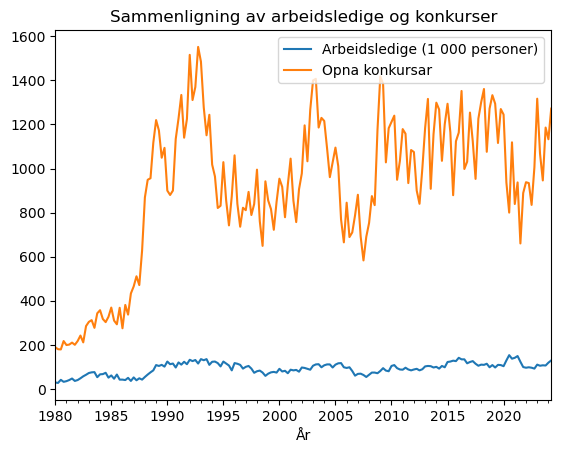

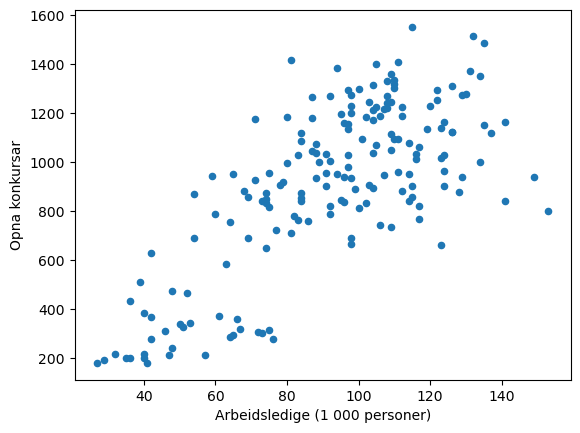

In [69]:
import matplotlib.pyplot as plt

df.plot()
plt.title("Sammenligning av arbeidsledige og konkurser")
plt.xlabel("År")

df.plot.scatter("Arbeidsledige (1 000 personer)","Opna konkursar")


* Å finne kovarians og korrelasjon er også lett

In [70]:
df.cov()

,Arbeidsledige (1 000 personer),Opna konkursar
Arbeidsledige (1 000 personer),767.688980,6932.145813
Opna konkursar,6932.145813,116239.520091


In [71]:
df.corr()

,Arbeidsledige (1 000 personer),Opna konkursar
Arbeidsledige (1 000 personer),1.000000,0.733835
Opna konkursar,0.733835,1.000000


* De som trenger en oppfriskning på kovarians og korrelasjon kan se her:


### Kovarians (video)
<a href="https://www.youtube.com/watch?v=9Y0Alg8huJk" 
  target="_blank"><img src="https://img.youtube.com/vi/9Y0Alg8huJk/0.jpg" 
alt="IMAGE ALT TEXT HERE" width="240" height="180" border="10" /></a>

### Korrelasjon (video)
<a href="https://www.youtube.com/watch?v=WpZi02ulCvQ" 
  target="_blank"><img src="https://img.youtube.com/vi/WpZi02ulCvQ/0.jpg" 
alt="IMAGE ALT TEXT HERE" width="240" height="180" border="10" /></a>
